# Visualizing Data 

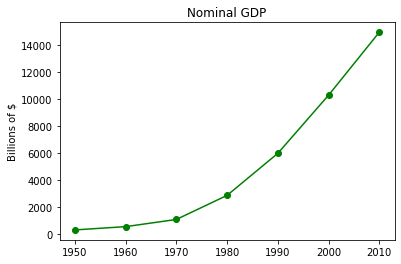

In [2]:
from matplotlib import pyplot as plt
years = [1950,1960,1970,1980,1990,2000,2010]
gdp = [300.2,543.3,1075.9,2862.5,5979.6,10289.7,14958.3]
plt.plot(years,gdp,color='green',marker='o',linestyle='solid')
plt.title('Nominal GDP')
plt.ylabel('Billions of $')
plt.show()

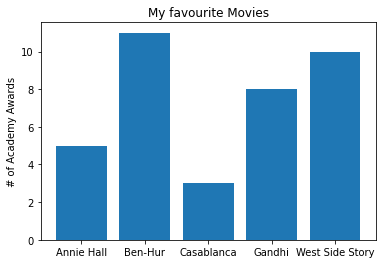

In [3]:
movies = ['Annie Hall','Ben-Hur','Casablanca','Gandhi','West Side Story']
num_oscars = [5,11,3,8,10]
plt.bar(range(len(movies)),num_oscars)
plt.title("My favourite Movies")
plt.ylabel("# of Academy Awards")
plt.xticks(range(len(movies)),movies)
plt.show()

Counter({80: 4, 90: 3, 70: 3, 0: 2, 60: 1})


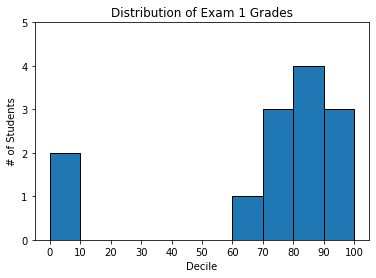

In [7]:
from collections import Counter
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
histogram = Counter(min(grades//10*10,90) for grades in grades)
print(histogram)
plt.bar([x+5 for x in histogram.keys()],
       histogram.values(),
       10,
       edgecolor = (0,0,0))
plt.axis([-5,105,0,5])
plt.xticks([10*i for i in range(11)])
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

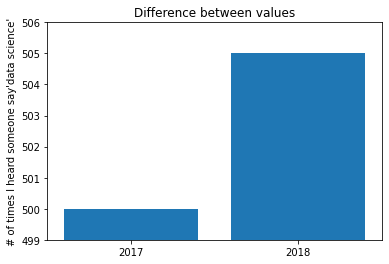

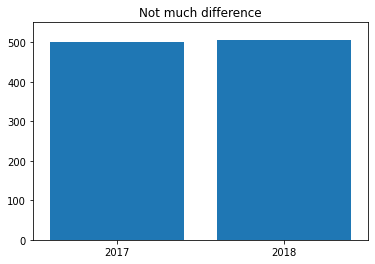

In [11]:
mentions = [500,505]
years = [2017,2018]
plt.bar(years,mentions,0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say'data science'")
#if we don't do the following matplotlib will label the x axis 0,1 and then add a +2.013e3 off in the corner
plt.ticklabel_format(useOffset=False)
# misleading y_axis only shows the part above 500
plt.axis([2016.5,2018.5,499,506]) # Range of x axis and y axis.
plt.title("Difference between values")
plt.show()

# If we use sensible axes:
mentions = [500,505]
years = [2017,2018]
plt.bar(years,mentions,0.8)
plt.xticks(years)
plt.axis([2016.5,2018.5,0,550]) # Range of x axis and y axis.
plt.title("Not much difference")
plt.show()

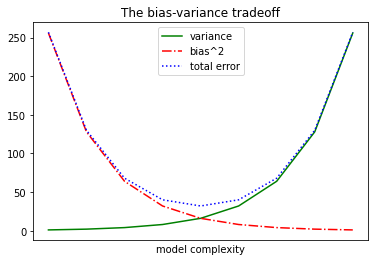

In [12]:
variance = [1,2,4,8,16,32,64,128,256]
bias_squared = [256,128,64,32,16,8,4,2,1]
total_error = [x+y for x, y in zip(variance,bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label = 'variance') # Green solid line
plt.plot(xs, bias_squared, 'r-.', label = 'bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:', label = 'total error') # blue dotted line
#loc=9 means top center
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The bias-variance tradeoff")
plt.show()

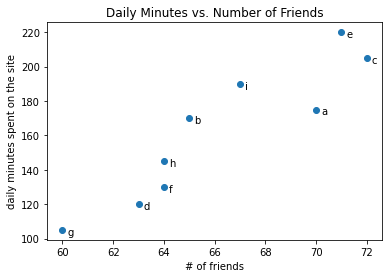

In [13]:
friends = [70,65,72,63,71,64,60,64,67]
minutes = [175,170,205,120,220,130,105,145,190]
labels = ['a','b','c','d','e','f','g','h','i']
plt.scatter(friends, minutes)

#labelling each point
for label, friend_count, minute_count in zip(labels,friends,minutes):
    plt.annotate(label,
                xy= (friend_count, minute_count), # Put the label with its point
                xytext= (5,-5),
                textcoords= 'offset points')
    
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

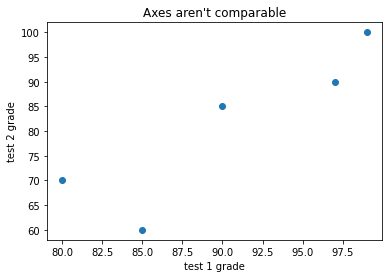

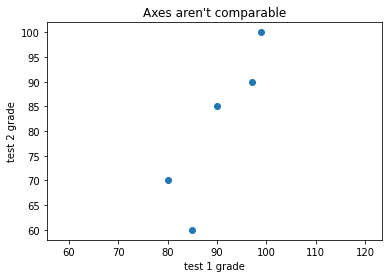

In [15]:
test_1_grades = [99,90,85,97,80]
test_2_grades = [100,85,60,90,70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes aren't comparable")
plt.xlabel('test 1 grade')
plt.ylabel('test 2 grade')
plt.show()

test_1_grades = [99,90,85,97,80]
test_2_grades = [100,85,60,90,70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes aren't comparable")
plt.xlabel('test 1 grade')
plt.ylabel('test 2 grade')
plt.axis("equal") # to make axes equal
plt.show()

In [16]:
# Other interesting visualization library
#seaborn, Altair, Bokeh

# Linear Algebra 

In [28]:
from typing import List
Vector = List[float]
height_weight_age = [70, #inches
                    170, # pounds
                    40] # years
grades = [95, #exam 1
         80, #exam 2
         75, #exam 3
         62] #exam 4

# Function for component-wise addition for lists:

def add(v: Vector , w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vector must be same length"
    return[v_i + w_i for v_i, w_i in zip(v,w)]

assert add([1,2,3],[4,5,6])==[5,7,9] # to check if the function works properly.

# Similarly we can define subtarction and scaler multiplication

In [30]:
# Dot product

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be of same length"
    
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

assert dot([1,2,3], [4,5,6]) == 32

print(dot([1,2,3], [4,5,6]))

32


In [32]:
# Calculating magnitude (or length):

from typing import List
import math

Vector = List[float]
def magnitude(v:Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(dot(v,v))

assert magnitude([3,4]) == 5
print(magnitude([3,4]))

5.0


In [35]:
# Distance between two vectors

from typing import List
import math

Vector = List[float]
def sum_of_squares(v: Vector) -> float:
    return dot(v,v)

def subtract(v: Vector , w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vector must be same length"
    return[v_i - w_i for v_i, w_i in zip(v,w)]

def squared_distance(v: Vector, w: Vector) -> float:
    return sum_of_squares(subtract(v,w))

def distance(v: Vector, w: Vector) -> float:
    return math.sqrt(squared_distance(v,w))

print(distance([1,2],[3,4]))

2.8284271247461903
